# Midpoint rule

Assume that $\{x_{0},x_{1},\ldots, x_{N}\}$ are $N+1$ in $[a,b]$ such that
\begin{align*}
a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b,
\end{align*}
and $\Delta x_{n}$ is defined as $\Delta x_{n}=x_{n}-x_{n-1}$. Then,
\begin{align*}
\int_{{\,a}}^{{\,b}}{{f\left( x \right)\,dx}} \approx \sum_{i=1}^{N}f(x^*_i) \Delta x_i,
\end{align*}

where $x_{i}^{*}$ are the midpoint of the intervals.

Now if, these points are equally distanced. i.e. $\Delta x_{n}= h>0$ for $n\in \{0,1,\ldots,N\}$ ,
\begin{align*}
\int _{a}^{b}f(x)\,dx\approx h\sum _{j=1}^{N} f\left(a+j\frac{h}{2}\right)
\end{align*}

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Midpoint(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    S : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Midpoint rule

    '''
     
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    # midpoints
    xmid=(x[0:N]+x[1:N+1])/2
    # discretizing function f on [a,b]
    fn = f(xmid)
    # the increment h
    h = (b - a)/N
    ### Trapezoidal rule
    M = h * np.sum(fn)
    return M
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [M] = Midpoint(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
T : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Trapezoidal rule

%}
% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
% the increment \delta x
h = (b - a) / N;
xm=(x(1:(n-1))+x(2:n))./2;
fx = f(xm);
M = h*sum(fx);
```
:::

::::

<font color='Blue'><b>Example</b></font>: Use the Midpoint rule and compute
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx,
\end{align*}
when
* **a)** $N = 5$,
* **b)** $N = 10$.

<font color='Green'><b>Solution</b></font>: We have,

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
def MidPointPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue'):
    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    
    # midpoints
    xmid=(x[0:N]+x[1:N+1])/2
    
    _ = ax.plot(X,Y)
    for i in range(N):
        ax.fill([x[i], x[i], x[i+1], x[i+1]], [0, f(x[i]), f(x[i+1]), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
    _ = ax.scatter(xmid, f(xmid), color= 'red', edgecolor = 'Black')
    _ = ax.set_xlim([min(x), max(x)])
    _ = ax.set_xticks(x)
    _ = ax.set_ylim([0, max(y)])
    ax1 = ax.twiny()
    _ = ax1.set_xlim(a, b)
    _ = ax1.set_xticks(xmid)
    _ = ax1.tick_params(axis='x', labelcolor= 'Blue', width=3)
    _ = ax1.set_xlabel('Midpoints', color='Blue')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

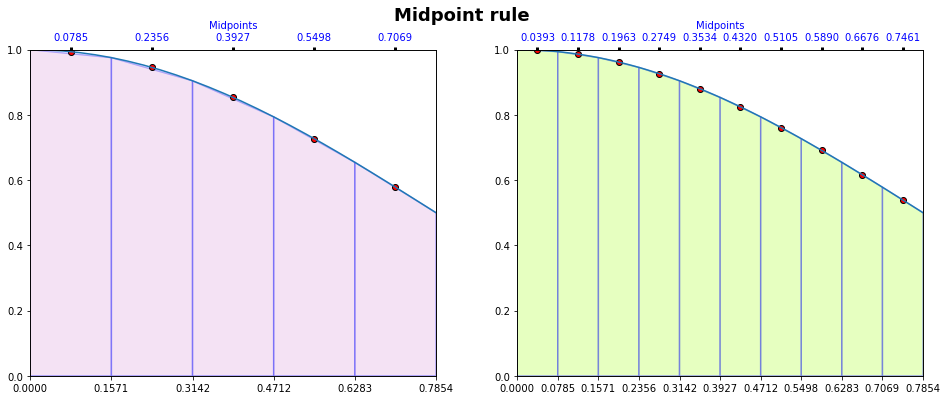

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Midpoint  

f = lambda x : np.cos(x)**2
a = 0
b = np.pi/4
N = [5, 10]
#
fig, ax = plt.subplots(nrows=1, ncols=len(N), figsize=(16, 6))
ax = ax.ravel()
Colors = ['Plum', 'GreenYellow']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle("Midpoint rule", fontproperties=font, fontsize = 18)
for i in range(len(ax)):
    MidPointPlots(f= f, a = a, b= b, N = N[i], ax = ax[i], CL = Colors[i])
    Int_trapz = Midpoint(f= f, a = a, b= b, N = N[i])
    txt = 'h\sum _{j=1}^{%i} f\\left(a+j\\frac{h}{2}\\right) = %.4e'
    display(Latex(txt % (N[i], Int_trapz)))
    del Int_trapz
del i

## Error Estimation

```{admonition} Error Estimation: Midpoint rule

```{math}
:label: Midpoint_Error
E_{h} = \left|\int _{a}^{b}f(x)\,dx - h\sum _{j=1}^{N} f\left(a+j\frac{h}{2}\right)\right|
 = \frac {(b-a)}{24}h^{2} f''(\xi),
 \qquad \text{for some }\xi \in [a, b].
```

```

<font color='Blue'><b>Example</b></font>: Evaluate
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx.
\end{align*}
using Midpoint rule in a way that error is less than $5 \times 10^{-6}$.

<font color='Green'><b>Solution</b></font>:
We know that
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx = \ln(x+1) \Big|_{0}^{2} = \ln(3).
\end{align*}
Also,
\begin{align*}
f(x) = \frac{1}{x+1} \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3} .
\end{align*}

In [4]:
E = 5e-6
f = lambda x : 1/(x+1)
f2 =  lambda x : 2/((x+1)**3)
Exact = np.log(3)
a =0
b= 2
x = np.linspace(a, b)
M = max(abs(f2(x)))
display(Latex('''\\max_{%.2f \leq x \leq %.2f}|f''(x)| = %.2f''' % (a, b, M)))

<IPython.core.display.Latex object>

Thus, it follows from solving the following inequality that

In [5]:
display(Latex('''\\frac{b -a}{24}h^2 \\max_{a \leq x \leq b}|f''(x)| \leq %.2e''' % E))
h = float('%.0e' % (np.sqrt(E/(((b-a)/24)*M))))
display(Latex('''h = %.2e''' % h))
N = int(np.ceil((b-a)/h))
display(Latex('''N = %i''' % N))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore,

In [6]:
T = Midpoint(f, a, b, N)
display(Latex('''E_{h} = %.2e''' % np.abs(Exact - T)))

<IPython.core.display.Latex object>

Moreover, to see the order of accuracy of this method, we can consider the following test.

In [7]:
import pandas as pd
h = [2**(-i) for i in range(3, 10)]

Cols = ['h', 'N', 'Eh']
Table = pd.DataFrame(np.zeros([len(h), len(Cols)], dtype = float), columns=Cols)
Table['h'] = h
Table['N'] = ((b-a)/Table['h']).astype(int)

for i in range(Table.shape[0]):
    Table.loc[i, 'Eh'] = np.abs(Midpoint(f, a, b, Table['N'][i]) - Exact)
    
display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

,h,N,Eh
0,1.2500e-01,1.6000e+01,5.7696e-04
1,6.2500e-02,3.2000e+01,1.4457e-04
2,3.1250e-02,6.4000e+01,3.6162e-05
3,1.5625e-02,1.2800e+02,9.0418e-06
4,7.8125e-03,2.5600e+02,2.2605e-06
5,3.9062e-03,5.1200e+02,5.6514e-07
6,1.9531e-03,1.0240e+03,1.4128e-07


In [9]:
hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ['Midpoint rule'], xlabel = r"$$i$$",
                               ylabel = " E_{h_{i}} / E_{h_{i-1}}",
                               title = 'Order of accuracy: Midpoint rule',
                               legend_orientation = 'horizontal')

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
1. Zarowski, Christopher J. An introduction to numerical analysis for electrical and computer engineers. John Wiley & Sons, 2004.
1. [Numerical integration Wikipedia page](https://en.wikipedia.org/wiki/Numerical_integration)
1. [Simpson's rule Wikipedia page](https://en.wikipedia.org/wiki/Simpson%27s_rule)
***